In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
import collections

In [4]:
nations = ['US', 'IN', 'DE', 'GB', 'JP']
country = pd.DataFrame()
for nation in nations:
    df = pd.DataFrame()
    filename = f'//Users/mahimakaushiva/Desktop/Youtube/Youtube/countries/{nation}videos.csv'
    df = pd.read_csv(filename)
    videos = collections.Counter(df['title'])
#     total = len(videos)
    codes = nation
    df['trending_days'] = df['title'].map(videos)
    df = df.drop_duplicates(subset='title', keep='last')
    df['region'] = codes
    country = country.append(df)
country.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_days,region
10,9wRQljFNDW8,17.14.11,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13T02:05:26.000Z,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...,1,US
36,Om_zGhJLZ5U,17.14.11,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,2017-11-12T18:00:03.000Z,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...,1,US
41,goP4Z5wyOlM,17.14.11,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,2017-11-12T21:16:40.000Z,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...,1,US
44,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,1,US
46,ogYum4kWXgk,17.14.11,People are Awesome & The Pet Collective presen...,People are Awesome,24,2017-11-13T13:00:06.000Z,"people are awesome|""people are awesome 2017""|""...",69844,3417,33,160,https://i.ytimg.com/vi/ogYum4kWXgk/default.jpg,False,False,False,Pets are Awesome! This is for all the animal l...,1,US


In [5]:
country.shape

(69314, 18)

In [6]:
set(country['trending_days'])

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 40}

In [7]:
# converting trending_date and publish_time to datetime

country['trending_date'] = pd.to_datetime(country['trending_date'],errors='coerce', format='%y.%d.%m')
country['publish_time'] = pd.to_datetime(country['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

country = country[country['trending_date'].notnull()]
country = country[country['publish_time'].notnull()]

country.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_days,region
10,9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13 02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...,1,US
36,Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,2017-11-12 18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...,1,US
41,goP4Z5wyOlM,2017-11-14,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,2017-11-12 21:16:40,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...,1,US
44,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11 15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,1,US
46,ogYum4kWXgk,2017-11-14,People are Awesome & The Pet Collective presen...,People are Awesome,24,2017-11-13 13:00:06,"people are awesome|""people are awesome 2017""|""...",69844,3417,33,160,https://i.ytimg.com/vi/ogYum4kWXgk/default.jpg,False,False,False,Pets are Awesome! This is for all the animal l...,1,US


In [8]:
country.shape

(69314, 18)

In [9]:
# removing incomplete rows

country = country.dropna(how = 'any', inplace = False, axis = 0)

In [10]:
country.shape

(66209, 18)

In [11]:
country.loc[country['trending_days']== 40]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_days,region
24355,4uTNVumfm84,2018-03-17,Maroon 5 - Wait,Maroon5VEVO,10,2018-02-08 14:00:00,"Maroon|""Wait""|""222""|""Records/Interscope""|""Reco...",46205645,633772,16442,23724,https://i.ytimg.com/vi/4uTNVumfm84/default.jpg,False,False,False,RED PILL BLUES” is out now.\nhttp://smarturl.i...,40,GB


In [12]:
country['description'].sample(5)

6503              チャンネル登録はこちらをクリック↓\nhttps://goo.gl/ycC8bG
37125    | Warum FAST*T man ? | DenizonDIESES VIDEO DIE...
26468    Als sich Stephen Paddock am 1. Oktober 2017 in...
27045    ► Subscribe Now: https://goo.gl/xs3mrY 🔔 Stay ...
16568    Hey we found a solution to the problem of the ...
Name: description, dtype: object

In [13]:
corr = country.corr(method='pearson')
corr

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,trending_days
category_id,1.000000,-0.103142,-0.115294,-0.026075,-0.055385,0.021821,0.007811,-0.028706,-0.120794
views,-0.103142,1.000000,0.769552,0.467811,0.525863,-0.014442,-0.015973,0.006746,0.336548
likes,-0.115294,0.769552,1.000000,0.487032,0.827878,-0.029596,-0.031037,0.005974,0.294863
dislikes,-0.026075,0.467811,0.487032,1.000000,0.622404,-0.010365,-0.014116,0.002060,0.126154
comment_count,-0.055385,0.525863,0.827878,0.622404,1.000000,-0.027971,-0.020287,0.001055,0.180328
comments_disabled,0.021821,-0.014442,-0.029596,-0.010365,-0.027971,1.000000,0.343475,-0.003277,-0.026095
ratings_disabled,0.007811,-0.015973,-0.031037,-0.014116,-0.020287,0.343475,1.000000,-0.002825,-0.037332
video_error_or_removed,-0.028706,0.006746,0.005974,0.002060,0.001055,-0.003277,-0.002825,1.000000,0.017641
trending_days,-0.120794,0.336548,0.294863,0.126154,0.180328,-0.026095,-0.037332,0.017641,1.000000


In [14]:
category =collections.Counter({2 : 'Autos & Vehicles', 
 1 : 'Film & Animation',
10 : 'Music',
15 : 'Pets & Animals',
17 : 'Sports',
18 : 'Short Movies',
19 : 'Travel & Events',
20 : 'Gaming',
21 : 'Videoblogging',
22 : 'People & Blogs',
23 : 'Comedy',
24 : 'Entertainment',
25 : 'News & Politics',
26 : 'Howto & Style',
27 : 'Education',
28 : 'Science & Technology',
29 : 'Nonprofits & Activism',
30 : 'Movies',
31 : 'Anime/Animation',
32 : 'Action/Adventure',
33 : 'Classics',
34 : 'Comedy',
35 : 'Documentary',
36 : 'Drama',
37 : 'Family',
38 : 'Foreign',
39 : 'Horror',
40 : 'Sci-Fi/Fantasy',
41 : 'Thriller',
42 : 'Shorts',
43 : 'Shows',
44 : 'Trailers'})
category

Counter({2: 'Autos & Vehicles',
         1: 'Film & Animation',
         10: 'Music',
         15: 'Pets & Animals',
         17: 'Sports',
         18: 'Short Movies',
         19: 'Travel & Events',
         20: 'Gaming',
         21: 'Videoblogging',
         22: 'People & Blogs',
         23: 'Comedy',
         24: 'Entertainment',
         25: 'News & Politics',
         26: 'Howto & Style',
         27: 'Education',
         28: 'Science & Technology',
         29: 'Nonprofits & Activism',
         30: 'Movies',
         31: 'Anime/Animation',
         32: 'Action/Adventure',
         33: 'Classics',
         34: 'Comedy',
         35: 'Documentary',
         36: 'Drama',
         37: 'Family',
         38: 'Foreign',
         39: 'Horror',
         40: 'Sci-Fi/Fantasy',
         41: 'Thriller',
         42: 'Shorts',
         43: 'Shows',
         44: 'Trailers'})

In [15]:
country['category']=country['category_id'].map(category)
# country = country.drop(columns = ['category_id'], axis = 1)
country.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_days,region,category
10,9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13 02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...,1,US,Sports
36,Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,2017-11-12 18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...,1,US,Film & Animation
41,goP4Z5wyOlM,2017-11-14,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,2017-11-12 21:16:40,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...,1,US,News & Politics
44,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11 15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,1,US,People & Blogs
46,ogYum4kWXgk,2017-11-14,People are Awesome & The Pet Collective presen...,People are Awesome,24,2017-11-13 13:00:06,"people are awesome|""people are awesome 2017""|""...",69844,3417,33,160,https://i.ytimg.com/vi/ogYum4kWXgk/default.jpg,False,False,False,Pets are Awesome! This is for all the animal l...,1,US,Entertainment


In [16]:
# views by category

country['category'].value_counts()

Entertainment            24282
People & Blogs            7816
News & Politics           6311
Music                     5111
Sports                    4253
Comedy                    3992
Film & Animation          3226
Howto & Style             3142
Gaming                    1901
Education                 1794
Science & Technology      1453
Pets & Animals            1147
Autos & Vehicles           982
Nonprofits & Activism      296
Travel & Events            268
Shows                      231
Movies                       3
Trailers                     1
Name: category, dtype: int64

**EDA**

In [15]:
# Sentiment analysis on video tags
# importing libraries

from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mahimakaushiva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mahimakaushiva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
MAX_N = 1000


en_stopwords = list(stopwords.words('english'))
de_stopwords = list(stopwords.words('german'))   
en_stopwords.extend(de_stopwords)


In [18]:
# polarities = list()


# for cate in category_list:
#     tags_word = country[country['category']==cate]['tags'].str.lower().str.cat(sep=' ')

# # removes punctuation,numbers and returns list of words
#     tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
#     word_tokens = word_tokenize(tags_word)
#     filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
#     without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# # Remove numbers
#     cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]      
    
# # Calculate frequency distribution
#     word_dist = nltk.FreqDist(cleaned_data_title)
#     hnhk = pd.DataFrame(word_dist.most_common(MAX_N), columns=['Word', 'Frequency'])

#     compound = .0
#     for word in hnhk['Word'].head(MAX_N):
#         compound += SentimentIntensityAnalyzer().polarity_scores(word)['compound']

#     polarities.append(compound)

# category_list = pd.DataFrame(category_list)
# polarities = pd.DataFrame(polarities)
# tags_sentiment = pd.concat([category_list,polarities],axis=1)
# tags_sentiment.columns = ['category','polarity']
# tags_sentiment=tags_sentiment.sort_values('polarity').reset_index()

# plt.figure(figsize=(16,10))
# sns.set(style="white",context="talk")
# ax = sns.barplot(x=tags_sentiment['polarity'],y=tags_sentiment['category'], data=tags_sentiment,orient='h',palette="RdBu")
# plt.xlabel("Categories")
# plt.ylabel("Polarity")
# plt.title("Polarity of Categories in Youtube videos")

In [19]:
def wcloud(data,bgcolor):
    plt.figure(figsize = (20,15))
    cloud = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 50)
    cloud.generate(' '.join(data))
    plt.imshow(cloud)
    plt.axis('off')

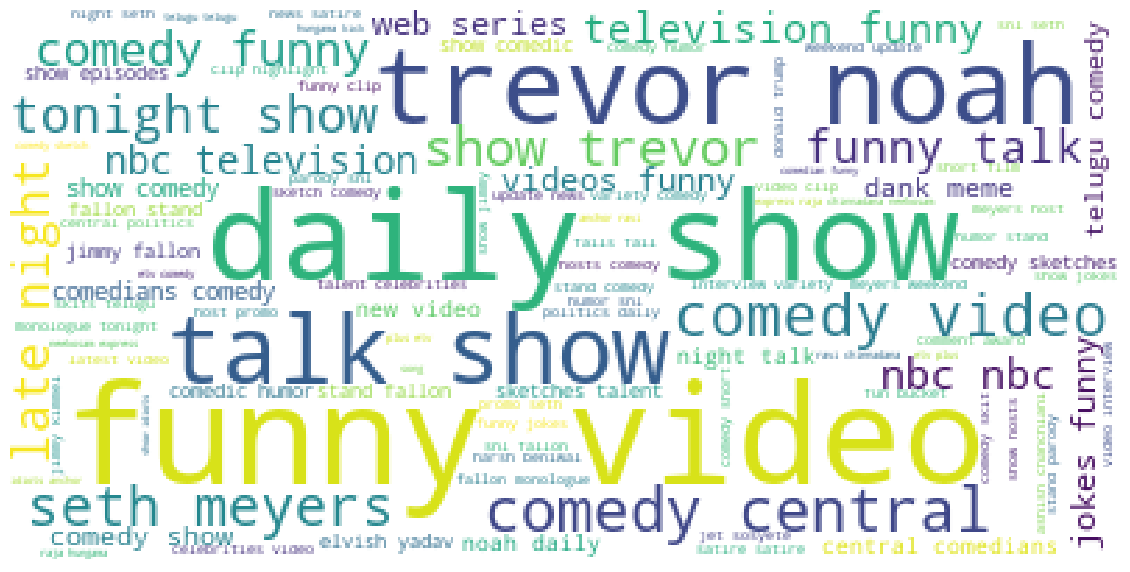

In [24]:
tags_word = country[country['category']=='Comedy']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

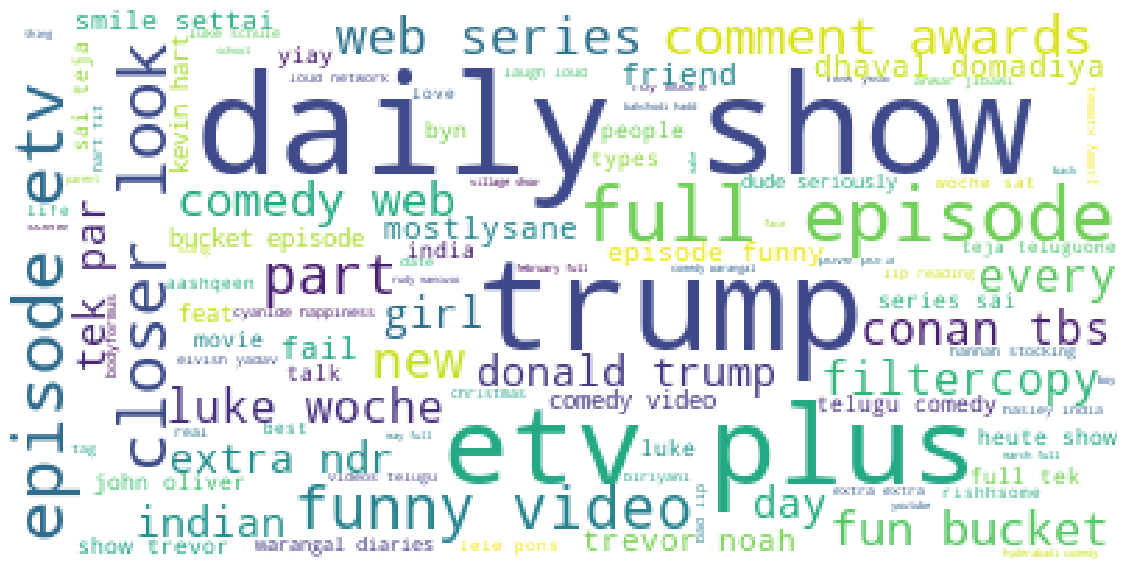

In [27]:
titles_word = country[country['category']=='Comedy']['title'].str.lower().str.cat(sep=' ')

titles_word = re.sub('[^A-Za-z]+', ' ', titles_word)
word_tokens = word_tokenize(titles_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

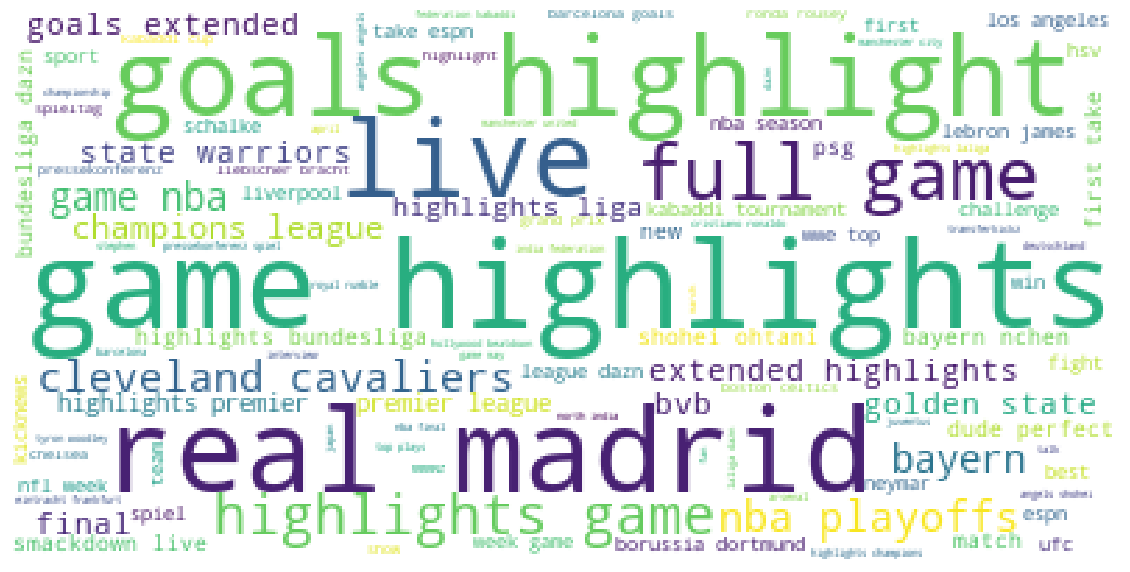

In [33]:
titles_word = country[country['category']=='Sports']['title'].str.lower().str.cat(sep=' ')

titles_word = re.sub('[^A-Za-z]+', ' ', titles_word)
word_tokens = word_tokenize(titles_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_titles = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_titles,'white')

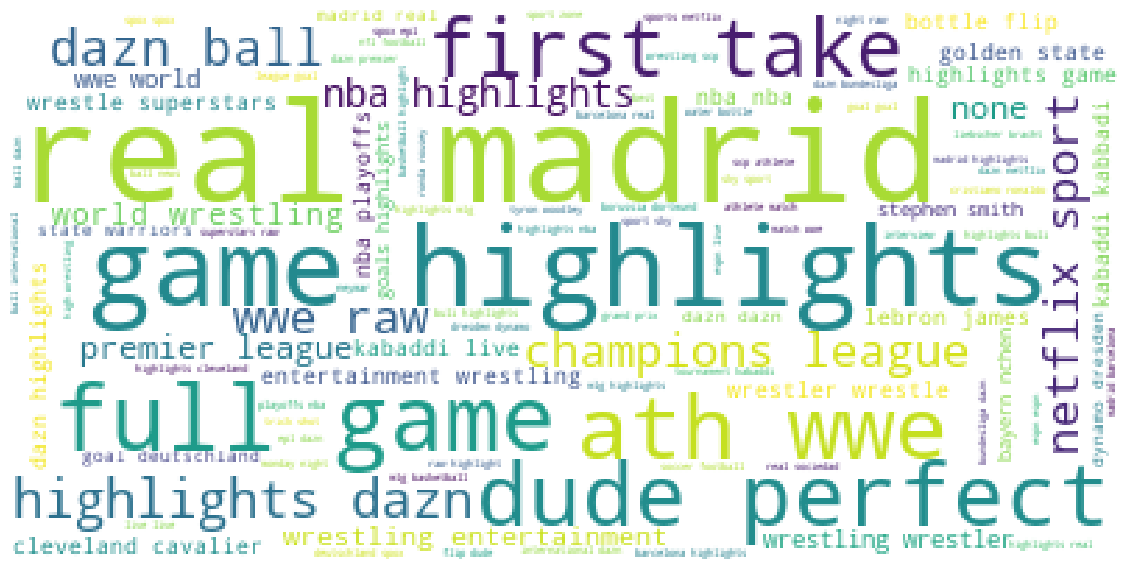

In [34]:
tags_word = country[country['category']=='Sports']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_tags = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_tags,'white')

In [50]:
# Calculating polarity, subjectivity and intensity

from textblob import TextBlob

TextBlob('i am so happy').polarity

0.8

In [28]:
# dropping the trailers and movies categories as they are too small

trailers = country[country.category == 'Trailers']
print(trailers)

Empty DataFrame
Columns: [channel_title, title, tags, description, category_id, category, region, trending_days, views]
Index: []


In [29]:
# delete row with index object 25841

country = country.drop([25841], axis=0)

KeyError: '[25841] not found in axis'

In [30]:
movies = country[country.category == 'Movies']
print(movies)

Empty DataFrame
Columns: [channel_title, title, tags, description, category_id, category, region, trending_days, views]
Index: []


In [27]:
# delete rows

country = country.drop([9376, 36042, 38400], axis=0)

KeyError: '[9376 36042 38400] not found in axis'

In [31]:
country.category.value_counts()

Entertainment            24280
People & Blogs            7816
News & Politics           6311
Music                     5110
Sports                    4252
Comedy                    3992
Film & Animation          3226
Howto & Style             3142
Gaming                    1901
Education                 1794
Science & Technology      1453
Pets & Animals            1147
Autos & Vehicles           982
Nonprofits & Activism      296
Travel & Events            268
Shows                      231
Name: category, dtype: int64

In [19]:
country.shape

(66202, 19)

In [20]:
# building our df for text preprocessing

country = country[['channel_title', 'title', 'tags', 'description', 'category_id', 'category', 'region','trending_days', 'views']]
country.head()

,channel_title,title,tags,description,category_id,category,region,trending_days,views
10,NFL,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",New England Patriots returner Dion Lewis blast...,17,Sports,US,1,81377
36,Screen Junkies,TL;DW - Every DCEU Movie Before Justice League,"screenjunkies|""screen junkies""|""sj news""|""hone...",With Justice League approaching fast we rewatc...,1,Film & Animation,US,1,288922
41,BBC News,Iraq-Iran earthquake: Deadly tremor hits borde...,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",A strong 7.2-magnitude earthquake has rattled ...,25,News & Politics,US,1,34785
44,Shawn Johnson East,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...","shawn johnson|""andrew east""|""shawn east""|""shaw...",Subscribe for weekly videos ▶ http://bit.ly/sj...,22,People & Blogs,US,1,321053
46,People are Awesome,People are Awesome & The Pet Collective presen...,"people are awesome|""people are awesome 2017""|""...",Pets are Awesome! This is for all the animal l...,24,Entertainment,US,1,69844


In [ ]:
# Text Pre-processing

!pip install spacy

In [69]:
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline
from spacy.lang.en import English
from translate import Translator

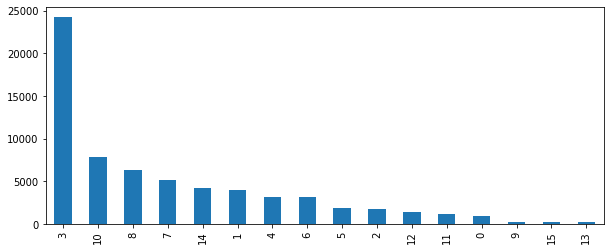

In [70]:
my_category = ['Entertainment', 'People & Blogs','News & Politics','Music','Sports','Comedy','Film & Animation',
           'Howto & Style','Gaming','Education', 'Science & Technology','Pets & Animals','Autos & Vehicles',
           'Nonprofits & Activism','Travel & Events','Shows']
plt.figure(figsize=(10,4))
country.category.value_counts().plot(kind= 'bar')

In [89]:
country['features'] = country['title'].map(str) + country['tags'] + country['description']
country['features']

10       Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...
36       TL;DW - Every DCEU Movie Before Justice League...
41       Iraq-Iran earthquake: Deadly tremor hits borde...
44       AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...
46       People are Awesome & The Pet Collective presen...
                               ...                        
20518    หนึ่งด้าวฟ้าเดียว NeungDaoFahDeaw EP.15 ตอนที่...
20519    2018 국민의 선택 - 선거방송 '왕의 귀환' 12시간 연속 생중계! (풀영상) ...
20520    元FBIエージェントが教える、200％人を引き付けるようになるコツ、トップ10人々を魅了する...
20521    日本×パラグアイ徹底分析&スペイン代表監督解任事件を解説【トークtheフットボール】#683...
20522    エサのコオロギに夢中で二本足で立つカメレオンよーらい|"佐賀よかでしょう"|"釣りよかでしょ...
Name: features, Length: 66201, dtype: object

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import class_weight
from numpy import array
from numpy import inf
from numpy.linalg import norm
from sklearn.feature_selection import chi2
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()
tokenizer = Tokenizer(nlp.vocab)

In [80]:
from translate import Translator

def translate(text):
    
    translator = Translator(from_lang='ko', to_lang='en')
    translator = Translator(from_lang='ja', to_lang='en')
    translator = Translator(from_lang='de', to_lang='en')
    translator = Translator(from_lang='hi', to_lang='en')
    translator = Translator(from_lang='ur', to_lang='en')
    translator = Translator(from_lang='ar', to_lang='en')
        
    return translator.translate(text)

In [81]:
# word tokenization

import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from spacy.tokenizer import Tokenizer

# create list of punctuation marks
punctuations = string.punctuation

# create list of stopwords
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# creating our tokenizer function
def spacy_tokenizer(sentence):
    # creating our token object, which is used to create documents with linguistic annotations
    mytokens = parser(sentence)
    
    # lemmatizing each token and converting to lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != '-PRON-' else word.lower_ for word in mytokens ]
    
    # removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations]
    
    # return preprocessed list of tokens
    return mytokens

In [82]:
# building a custom transformer

from sklearn.base import TransformerMixin
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(country.category)
country.category = le.transform(country.category)
country.head()

,channel_title,title,tags,description,category_id,category,region,trending_days,views,features
10,NFL,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",New England Patriots returner Dion Lewis blast...,17,14,US,1,81377,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...
36,Screen Junkies,TL;DW - Every DCEU Movie Before Justice League,"screenjunkies|""screen junkies""|""sj news""|""hone...",With Justice League approaching fast we rewatc...,1,4,US,1,288922,TL;DW - Every DCEU Movie Before Justice League...
41,BBC News,Iraq-Iran earthquake: Deadly tremor hits borde...,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",A strong 7.2-magnitude earthquake has rattled ...,25,8,US,1,34785,Iraq-Iran earthquake: Deadly tremor hits borde...
44,Shawn Johnson East,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...","shawn johnson|""andrew east""|""shawn east""|""shaw...",Subscribe for weekly videos ▶ http://bit.ly/sj...,22,10,US,1,321053,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -..."
46,People are Awesome,People are Awesome & The Pet Collective presen...,"people are awesome|""people are awesome 2017""|""...",Pets are Awesome! This is for all the animal l...,24,3,US,1,69844,People are Awesome & The Pet Collective presen...


In [84]:
#Vectorization Feature Engineering (TF-IDF)

#bag of words

bow_vector = CountVectorizer(tokenizer= spacy_tokenizer, ngram_range=(1,1))
bow_vector

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function spacy_tokenizer at 0x1a25b137a0>,
                vocabulary=None)

In [85]:
tfidf_vectorizer = TfidfVectorizer(tokenizer = spacy_tokenizer)
tfidf_vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function spacy_tokenizer at 0x1a25b137a0>,
                use_idf=True, vocabulary=None)

In [87]:
# Splitting the data into training and test sets

X = country.features
y = country.category

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [ ]:
# class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

In [ ]:
# count_train = CountVectorizer.fit(country.features)
# bow = CountVectorizer.transform(country.features)

In [ ]:
# # Creating pipeline and generating model


# # Logistic Regression Classifier
# classifier = LogisticRegression()

# # Create pipeline using BoW
# pipe = Pipeline([('cleaner', predictors()), ('vectorizer', bow_vector), ('classifier', classifier), ('class_weights', class_weight)])

# # model generation
# pipe.fit(X_train, y_train)

In [ ]:
# # evaluating the model - how accurately does our model predict which category the feature belongs to

# # predicting with a test dataset
# predicted = pipe.predict(X_test)

# # model accuracy
# print('Logistic Regression Accuracy:', metrics.accuracy_score(y_test, predicted))
# print('Logistic Regression Precision:', metrics.precision_score(y_test, predicted))
# print('Logistic Regression Recall:', metrics.recall_score(y_test, predicted))

In [138]:
# set(y_test) - set(y_pred)

In [ ]:
np.unique(y_pred)

In [ ]:
np.unique(y_test)

In [ ]:
train_features = country['features'][:train_size]
train_categories = country['category'][:train_size]

test_features = country['features'][train_size:]
test_categories = country['category'][train_size:]

In [ ]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [ ]:
tokenize.fit_on_texts(train_features) # only fit on train
x_train = tokenize.texts_to_matrix(train_features)
x_test = tokenize.texts_to_matrix(test_features)

In [ ]:
encoder = LabelEncoder()
encoder.fit(train_categories)
y_train = encoder.transform(train_categories)
y_test = encoder.transform(test_categories)

In [ ]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [ ]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

In [ ]:
# sm = SMOTE(random_state=2)
# X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

# parameters = {'C': np.linspace(1, 10, 10)}
# lr = LogisticRegression()
# clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
# clf.fit(X_train_res, y_train_res.ravel())

In [ ]:
# # Using SMOTE to balance out the classes

# from imblearn.over_sampling import SMOTE

# smote = SMOTE('minority')
# X_sm, y_sm = smote.fit_sample(X_train, y_train)
# print(X_sm.shape, y_sm.shape)

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, labels = np.unique(y_pred)))

NameError: name 'CountVectorizer' is not defined

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels = list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter = 5,tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, target_names=my_category))

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('clf', LogisticRegression(n_jobs=1, C=1e5)),
                  ])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, labels = np.unique(y_pred)))

In [ ]:
def plot_confusion_matrix(cm, classes, normalize= False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix without Normalization')
        
        # print cm
        
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=90)
        plt.yticks(tick_marks, classes)
        
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max()/2
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt)),
            horizontalalignment = 'center'
            color= 'white' if cm[i, j] > thresh else "black"
            
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        
y_pred = model.predict(x_test)
cnf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
    
# plot normalized confusion matrix
fig = plt.figure()
fig.set_size_inches(14, 12, forward = True)
#fig.align_labels
    
#fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(cnf_matrix, classes= np.asarray(labels), normalize= True, title = 'Normalized confusion matrix')
    
fig.savefig("txt_classification-smote" + str(num_epochs) + ".png", pad_inches = 5.0)

In [ ]:
!pip install gensim

In [ ]:
import gensim
from gensim import models
from gensim.models import KeyedVectors

In [ ]:
#Word2vec and Logistic Regression

#Word2vec is a type of mapping that allows words with similar meaning to have a similar vector representation
#Objective - we want to use the surrounding words to represent the target word with a 
#neural network whose hidden layer encodes the word representation


# import gzip
# import shutil
# import gensim.downloader as api
# from gensim.models import Word2Vec


# with gzip.open("GoogleNews-vectors-negative300.bin.gz", 'rb') as f_in:
#     with open("GoogleNews-vectors-negative300.bin", 'wb') as f_out:
#         shutil.copyfileobj(f_in, f_out)

# wv = api.load('word2vec-google-news-300')

In [ ]:
# BoW with Keras



In [ ]:
import itertools
import os
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

# This code was tested with TensorFlow v1.4
print("You have TensorFlow version", tf.__version__)

In [ ]:
country.head()

In [ ]:
country['category'].value_counts()

In [ ]:
train_size = int(len(df) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(df) - train_size))

In [ ]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

In [92]:
!pip install lime

     |████████████████████████████████| 276kB 1.6MB/s eta 0:00:01
  Created wheel for lime: filename=lime-0.1.1.37-cp37-none-any.whl size=284276 sha256=71f576f5c272f9884888ed9f3bd31e52447f005759222eabc1d5b1f42d290692
  Stored in directory: /Users/mahimakaushiva/Library/Caches/pip/wheels/c1/38/e7/50d75d4fb75afa604570dc42f20c5c5f5ab26d3fbe8d6ef27b
  Created wheel for progressbar: filename=progressbar-2.5-cp37-none-any.whl size=12073 sha256=90ce40c103064149a84af10f013ae2ee1ceb77c1da1454985bb934ea218cba62
  Stored in directory: /Users/mahimakaushiva/Library/Caches/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built lime progressbar


In [94]:
!pip install pyLDavis

     |████████████████████████████████| 1.6MB 1.7MB/s eta 0:00:01
     |████████████████████████████████| 552kB 703kB/s eta 0:00:01
  Created wheel for pyLDavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=cf61c2ef79a60bf187eff6318c5ff5d0a526ac8ea29465cf28022cea789fa15c
  Stored in directory: /Users/mahimakaushiva/Library/Caches/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32040 sha256=adec6c57bc399e78924e04377ef80c2f71d4fd14ba6b95d7ad6b9e8c76637cd4
  Stored in directory: /Users/mahimakaushiva/Library/Caches/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDavis funcy


In [96]:
from lime.lime_text import LimeTextExplainer
from tqdm import tqdm
import string
import random
import operator
import seaborn as sns
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from statistics import *
import concurrent.futures
import time
import pyLDAvis.sklearn
from pylab import bone, pcolor, colorbar, plot, show, rcParams, savefig
import warnings
import nltk

# spaCy based imports
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# keras module for building LSTM 
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku 

# # set seeds for reproducability
# from tensorflow import set_random_seed
# from numpy.random import seed


In [98]:
# Entertainment            24280
# People & Blogs            7816
# News & Politics           6311
# Music                     5110
# Sports                    4252
# Comedy                    3992
# Film & Animation          3226
# Howto & Style             3142

In [100]:
# selecting popular Youtube videos

entertainment_title= country["title"][(country['category'] == 'Entertainment')] 
news_politics_title= country["title"][(country['category'] == 'News & Politics')] 
people_title= country["title"][(country['category'] == 'People & Blogs')] 
music_title= country["title"][(country['category'] == 'Music')] 
sports_title= country["title"][(country['category'] == 'Sports')] 
comedy_title= country["title"][(country['category'] == 'Comedy')] 

titles_to_include = country["title"][(country['category'] != 'Music')]
titles_to_include.head()
titles_to_include.count()

66201

In [101]:
Q1 = country.views.quantile(0.25)
Q2 = country.views.quantile(0.5)
Q3 = country.views.quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q2)
print(Q3)

#popular_videos=three_countries.loc[three_countries.views > (Q3 + 1.5 * IQR)]
popular_videos=country[country.views > (Q2)]

country['popular']=0
#country.loc[country.views > (Q3 + 1.5 * IQR),'popular']=1
country.loc[country.views > (Q2),'popular']=1

country['popular'].value_counts()

36641.0
140615.0
486598.0


0    33101
1    33100
Name: popular, dtype: int64

In [103]:
popular = country["title"][country["popular"] == 1].apply(spacy_tokenizer)

In [137]:
# #tokenize words by popularity 

# def word_generator(text):
#     word = list(text.split())
#     return word
# def bigram_generator(text):
#     bgram = list(nltk.bigrams(text.split()))
#     bgram = [' '.join((a, b)) for (a, b) in bgram]
#     return bgram
# def trigram_generator(text):
#     tgram = list(nltk.trigrams(text.split()))
#     tgram = [' '.join((a, b, c)) for (a, b, c) in tgram]
#     return tgram


# #normal_words = normal.apply(word_generator)
# popular_words = popular.apply(word_generator)
# #normal_bigrams = normal.apply(bigram_generator)
# popular_bigrams = popular.apply(bigram_generator)
# #normal_trigrams = normal.apply(trigram_generator)
# popular_trigrams = popular.apply(trigram_generator)

In [135]:
# #function that makes a pretty word frequency plot

# def word_plot(words,my_color):
#     slist =[]
#     for x in words:
#         slist.extend(x)
#     fig = plt.figure(figsize=(15, 10))
#     pd.Series(slist).value_counts()[:20].sort_values(ascending=True).plot(kind='barh',fontsize=20, color=my_color)
#     plt.show()

In [136]:
# word_plot(popular_words, 'blue')

In [112]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(country.title)
word_features = word_vectorizer.transform(country.title)

classifier_popular = LogisticRegression(C=0.1, solver='sag')
classifier_popular.fit(word_features , country.popular)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
names=['normal','popular']

In [134]:
# from sklearn.pipeline import Pipeline
# c_tf = make_pipeline(word_vectorizer, classifier_popular)
# explainer_tf = LimeTextExplainer(class_names=names)

# exp = explainer_tf.explain_instance(country.title.iloc[10], c_tf.predict_proba, num_features=4, top_labels=1)
# exp.show_in_notebook(text= country.title.iloc[10])

**LSTM 1- generating text**

In [124]:
# generating titles by LSTM

tokenizer = Tokenizer()

def get_sequence_of_tokens(corpus):
    ## tokenization
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    
    ## convert data to sequence of tokens 
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

inp_sequences, total_words = get_sequence_of_tokens(popular)
inp_sequences[:10]

[[20371, 20372],
 [20371, 20372, 18],
 [20371, 20372, 18, 870],
 [20371, 20372, 18, 870, 138],
 [7768, 897],
 [7768, 897, 7769],
 [7768, 897, 7769, 20373],
 [7768, 897, 7769, 20373, 1799],
 [7768, 897, 7769, 20373, 1799, 1706],
 [7768, 897, 7769, 20373, 1799, 1706, 374]]

In [125]:
def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
    
    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes=total_words)
    return predictors, label, max_sequence_len

predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)

In [126]:
def create_model(max_sequence_len, total_words):
    input_len = max_sequence_len - 1
    model = Sequential()
    
    # Add Input Embedding Layer
    model.add(Embedding(total_words, 10, input_length=input_len))
    
    # Add Hidden Layer 1 - LSTM Layer
    model.add(LSTM(100))
    model.add(Dropout(0.1))
    
    # Add Output Layer
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

model = create_model(max_sequence_len, total_words)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 10)            513340    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               44400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 51334)             5184734   
Total params: 5,742,474
Trainable params: 5,742,474
Non-trainable params: 0
_________________________________________________________________


In [127]:
model.fit(predictors, label, epochs=5, verbose=5)

/Users/mahimakaushiva/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


In [128]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict_classes(token_list, verbose=0)
        
        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

In [133]:
# print (generate_text("Drake", 7, model, max_sequence_len))
print (generate_text("united states", 5, model, max_sequence_len))
print (generate_text("Bangtan", 4, model, max_sequence_len))
print (generate_text("Fergie", 4, model, max_sequence_len))
print (generate_text("korea", 4, model, max_sequence_len))
# print (generate_text("Minnesota", 4, model, max_sequence_len))

United States Official Trailer Hd Netflix Movie
Bangtan Vs 68 Vs. Raw
Fergie Vs Real Madrid 1
Korea X Lil Pump Official


**LSTM- 2** - attempting to predict which category the title belongs to

In [32]:
country['category'].value_counts().sort_values(ascending= False)

Entertainment            24280
People & Blogs            7816
News & Politics           6311
Music                     5110
Sports                    4252
Comedy                    3992
Film & Animation          3226
Howto & Style             3142
Gaming                    1901
Education                 1794
Science & Technology      1453
Pets & Animals            1147
Autos & Vehicles           982
Nonprofits & Activism      296
Travel & Events            268
Shows                      231
Name: category, dtype: int64

In [34]:
# cleaning the text

from nltk.corpus import stopwords

country = country.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
country['title'] = country['title'].apply(clean_text)
country['title'] = country['title'].str.replace('\d+', '')

In [36]:
print(country['title'].sample(5))

50589                           lass sie zurck master mind
439                       surface book  macbook pro killer
20453    ipl  kingfisher funny commercial ads video lov...
8879                 girls get wild drunk baap bakchod sid
61880                                             zozosuit
Name: title, dtype: object


In [41]:
# LSTM modeling

#Vectorization by converting each text into a sequence of integers or a vector
#We want results from the top 50000 words
#Set the maximum number of words in each title to 7

# keras module for building LSTM 
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku 

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 7
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(country['title'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Using TensorFlow backend.


Found 53926 unique tokens.


In [42]:
# truncate and pad the input sequence so they are all in the same length for modeling

X = tokenizer.texts_to_sequences(country['title'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (66201, 7)


In [44]:
# converting categorical labels to numbers

Y = pd.get_dummies(country['category']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (66201, 16)


In [45]:
# Train-test-split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(59580, 7) (59580, 16)
(6621, 7) (6621, 16)


In [47]:
batch_size = len(X)
batch_size

66201

In [62]:
# first layer is the embedded layer that uses 100 length vectors to represent each word
# spatialdropout1d performs variational dropout
# the next layer is the LSTM layer with 100 memory units
# output layer must contain 16 output values, one for each class
# activation function is softmax for multi-class classification
# categorical_crossentropy is used as the loss function

from keras.layers.core import Dense, SpatialDropout1D
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(16, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


/Users/mahimakaushiva/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 53622 samples, validate on 5958 samples
Epoch 1/5
53622/53622 [==============================] - 54s 1ms/step - loss: 1.6896 - accuracy: 0.4869 - val_loss: 1.3136 - val_accuracy: 0.5916
Epoch 2/5
53622/53622 [==============================] - 53s 988us/step - loss: 1.0149 - accuracy: 0.6897 - val_loss: 1.2056 - val_accuracy: 0.6383
Epoch 3/5
53622/53622 [==============================] - 52s 962us/step - loss: 0.7223 - accuracy: 0.7744 - val_loss: 1.2769 - val_accuracy: 0.6393
Epoch 4/5
53622/53622 [==============================] - 52s 975us/step - loss: 0.5931 - accuracy: 0.8114 - val_loss: 1.3386 - val_accuracy: 0.6378
Epoch 5/5
53622/53622 [==============================] - 50s 927us/step - loss: 0.5269 - accuracy: 0.8288 - val_loss: 1.4333 - val_accuracy: 0.6383


In [63]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

6621/6621 [==============================] - 0s 74us/step
Test set
  Loss: 1.348
  Accuracy: 0.650


In [59]:
# history = model.fit(X_train, Y_train, nb_epoch=5, shuffle=True)

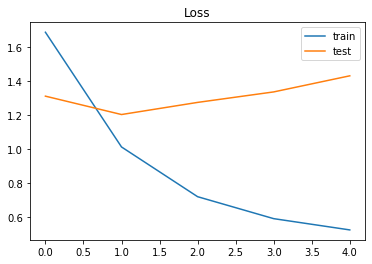

In [64]:
# visualising the loss between train and test
plt.title('Loss')
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

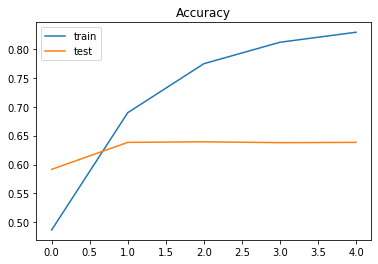

In [67]:
# visualising the accuracy between train and test
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [90]:
# country['title'].sample(5)

In [89]:
# testing with a new title

new_title = ['dwayne johnson eciting baby news']
seq = tokenizer.texts_to_sequences(new_title)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Entertainment', 'People & Blogs', 'News & Politics','Music','Sports','Comedy','Film & Animation', 'Howto & Style','Gaming',
          'Education','Science & Technology','Pets & Animals','Autos & Vehicles','Nonprofits & Activism','Travel & Events','Shows']
print(pred, labels[np.argmax(pred)])

[[5.1286338e-06 4.7775914e-04 5.4822416e-05 9.8811918e-01 1.0190484e-03
  1.5776446e-04 3.7624028e-05 1.0922675e-03 1.4086666e-03 2.7691729e-07
  7.5314003e-03 1.3557341e-05 3.3049062e-06 3.7359157e-05 4.1264022e-05
  6.4531008e-07]] Music
